### Forma Manual

- Cómo determinar si se trata de un Perro a un gato en base a las variables:
    - Altura
    - Peso
    - Temperatura
    
* Datos de prueba:
* Alrura  Peso    Temperatura Designacion
* 13      0.6     40          Gato
* 22      0.6     41          Gato
* 35      1.2     37          Perro
* 25      0.8     38          Gato
* 33      0.9     40          Perro
* 18      0.8     35          Gato
* 21      0.9     37          Perro

Algoritmo: `DecisionTreeClassifier`

Libreria: ``sklear``



In [259]:
#Instalar dependencias, si no funciona se agrega el "!" al inicio del comando
#pip install scikit-learn

In [260]:
# Importar las librerias
from sklearn.tree import DecisionTreeClassifier


In [261]:
#Cargar los datos

features = [
    [13, 0.6, 40],
    [22, 0.6, 41],
    [35, 1.2, 37],
    [25, 0.8, 38],
    [33, 0.9, 40],
    [18, 0.8, 35],
    [21, 0.9, 37],
    [30, 1.3, 36],
    [17, 0.6, 36],
    [35, 1.3, 40],
    [28, 1.0, 39],
    [15, 0.9, 38]
]

labels = [0,0,1,0,1,0,1,1,0,1,1,0]



In [262]:
#Seleccionar el modelo
clasificar = DecisionTreeClassifier()

#Entrenar el algoritmo (Aprende)

clasificar.fit(features, labels)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [263]:
pred = clasificar.predict([[15, 1.6, 36]])
print(pred)
_ = bool(pred)  #Convertir a booleano
("Gato", "Perro")[_]


[0]


'Gato'

## Dataset `Diagnostico.csv`

- Para predecir la enfermedad(Faringitis, Resfriado, Alergia) que tiene un paciente, en función de:
    - Dolor de garganta
    - Fiebre
    - Glandulas inflamadas
    - Congestion
    - Dolor de cabeza

In [288]:
#!pip install pandas
#!pip install matplotlib

In [289]:
#Importar las librerias
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib as plt

In [290]:
#Leer datos del archivo
data = pd.read_csv("./diagnostico.csv")
data.head()



,Patient ID,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,1,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,2,No,No,No,Yes,Yes,Allergy
2,3,Yes,Yes,No,Yes,No,Cold
3,4,Yes,No,Yes,No,No,Strep thoat
4,5,No,Yes,No,Yes,No,Cold


In [291]:
#Elimino la columna "Paciente ID" porque no aporta nada al modelo
data = data.drop(columns=["Patient ID"])
data.head()

,Sore throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold


In [292]:
datos = data.rename(columns={
    "Sore throat": "Dolor de garganta",
    "Fever": "Fiebre",
    "Swollen Glands": "Glandulas inflamadas",
    "Congestion": "Congestion",
    "Headache": "Dolor de cabeza",
    "Diagnosis": "Diagnostico"
})
datos.head()

,Dolor de garganta,Fiebre,Glandulas inflamadas,Congestion,Dolor de cabeza,Diagnostico
0,Yes,Yes,Yes,Yes,Yes,Strep thoat
1,No,No,No,Yes,Yes,Allergy
2,Yes,Yes,No,Yes,No,Cold
3,Yes,No,Yes,No,No,Strep thoat
4,No,Yes,No,Yes,No,Cold


#Listar los valores de ``Clase`` o ``Target``

In [293]:

datos.Diagnostico.unique().tolist()



['Strep thoat', 'Allergy', 'Cold']

``Mapear`` los valores de las variables de tipo  ``Nominal`` a ``Numérico``

In [294]:
atributos = list(datos.columns)

for atri in atributos:
    if atri != "Diagnostico":
        datos[atri] = datos[atri].map({"Yes":1, "No":0})
    else:
        datos[atri] = datos[atri].map({'Strep thoat':0,  "Allergy":1,"Cold":2})

datos.head(10)

,Dolor de garganta,Fiebre,Glandulas inflamadas,Congestion,Dolor de cabeza,Diagnostico
0,1,1,1,1,1,0
1,0,0,0,1,1,1
2,1,1,0,1,0,2
3,1,0,1,0,0,0
4,0,1,0,1,0,2
5,0,0,0,1,0,1
6,0,0,1,0,0,0
7,1,0,0,1,1,1
8,0,1,0,1,1,2
9,1,1,0,1,1,2


Separamos las variables independientes y dependientes

In [295]:
var_independientes = datos.columns[:-1].tolist()  #Todas las columnas menos la ultima
var_independientes
x = datos[var_independientes].values
y = datos["Diagnostico"]
y

0    0
1    1
2    2
3    0
4    2
5    1
6    0
7    1
8    2
9    2
Name: Diagnostico, dtype: int64

Seleccionar el modelo de clasificacion y entrenarlo

In [296]:
clasificar = DecisionTreeClassifier()
clasificar.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Prediccion de valores

In [297]:
pred = clasificar.predict([[1, 1, 0, 1, 1]])
print(pred)
_ = bool(pred)  
("Strep thoat",  "Allergy", "Cold")[_]


[2]


'Allergy'

Generar las `Reglas del arbol`

In [298]:
from sklearn import tree
reglas_arbol = tree.export_text(clasificar, feature_names=var_independientes, class_names=["Faringitis",  "Alergia", "Resfriado"],
                                show_weights=True, decimals=0)
print(reglas_arbol)


|--- Glandulas inflamadas <= 0
|   |--- Fiebre <= 0
|   |   |--- weights: [0, 3, 0] class: Alergia
|   |--- Fiebre >  0
|   |   |--- weights: [0, 0, 4] class: Resfriado
|--- Glandulas inflamadas >  0
|   |--- weights: [3, 0, 0] class: Faringitis



Graficamos el `Arbol de decision`

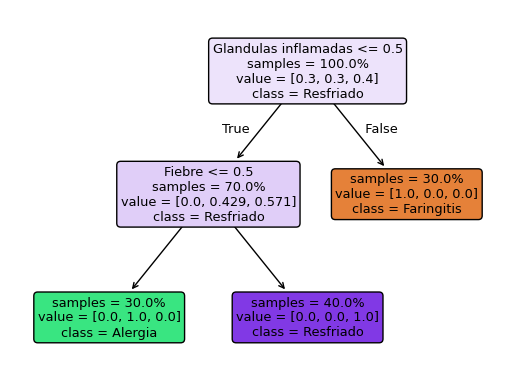

In [301]:
arbol = tree.plot_tree(clasificar, feature_names=var_independientes, class_names=["Faringitis",  "Alergia", "Resfriado"],
                          filled=True, rounded=True, impurity=False, proportion=True)
